Comienzas en una posición determinada, el estado inicial. Desde cualquier estado puedes ir a la izquierda, derecha, arriba o abajo o permanecer en el mismo lugar siempre que no cruces las instalaciones del laberinto. Cada acción te llevará a una celda de la cuadrícula (un estado diferente). Ahora, hay un cofre del tesoro en uno de los estados (el estado objetivo). Además, el laberinto tiene un pozo de serpientes en cierta posicion/estado. Tu objetivo es viajar desde el estado inicial al estado objetivo siguiendo un camino que no tenga serpientes.

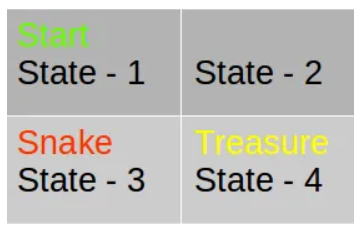

In [1]:
import numpy as np
import random

In [2]:
# Definición del factor de descuento
gamma = 0.8

In [3]:
# Definición de la matriz de recompensas
#A - arriba, B - abajo, I - izquierda, D - derecha
#                   A   B   I   D
reward = np.array([[0, -10, 0, -1, -1],
                  [0, 10, -1, 0, -1],
                  [-1, 0, 0, 10, -1],
                  [-1, 0, -10, 0, 10]])

In [4]:
# Creación de la matriz Q inicializada con ceros
q_matrix = np.zeros((4, 5))

In [5]:
# Definición de la matriz de transición
transition_matrix = np.array([[-1, 2, -1, 1, 0],
                              [-1, 3, 0, -1, 1],
                              [0, -1, -1, 3, 2],
                              [1, -1, 2, -1, 3]])

In [6]:
# Definición de las acciones válidas para cada estado
valid_action = np.array([[1, 3, 4],
                         [1, 2, 4],
                         [0, 3, 4],
                         [0, 2, 4]])

Actualizaremos la tabla usando la ecuación de Bellman.

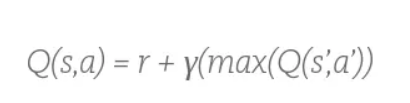

In [8]:
# Iteraciones de entrenamiento
for i in range(10):
    start_state = 0
    current_state = start_state

    # Bucle para realizar acciones hasta alcanzar el estado objetivo
    while current_state != 3:
        action = random.choice(valid_action[current_state])  # Se selecciona una acción aleatoria entre las acciones válidas para el estado actual.
        next_state = transition_matrix[current_state][action]  # Se obtiene el próximo estado a partir de la matriz de transición, utilizando el estado actual y la acción seleccionada.

        future_rewards = []  # Lista para almacenar las recompensas futuras

        # Bucle para calcular las recompensas futuras para cada acción válida en el próximo estado
        for action_nxt in valid_action[next_state]:
            future_rewards.append(q_matrix[next_state][action_nxt])

        # Cálculo del valor Q para el estado actual y la acción seleccionada
        q_state = reward[current_state][action] + gamma * max(future_rewards)

        # Actualización de la matriz Q
        q_matrix[current_state][action] = q_state

        current_state = next_state  # Actualización del estado actual

        if current_state == 3:
            print('goal state reached')  # Se alcanzó el estado objetivo

# Impresión de la matriz Q final
print('final q-matrix : ')
print(q_matrix)

goal state reached
goal state reached
goal state reached
goal state reached
goal state reached
goal state reached
goal state reached
goal state reached
goal state reached
goal state reached
final q-matrix : 
[[ 0.  -2.   0.   7.   4.6]
 [ 0.  10.   4.6  0.   7. ]
 [ 4.6  0.   0.  10.   7. ]
 [ 0.   0.   0.   0.   0. ]]
